In [44]:
import psycopg2
from psycopg2.extras import DictCursor
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [45]:
sql_host = '10.129.0.25'

In [46]:
!env | grep POST

POSTGRESQL_USER=reader
POSTGRESQL_PASSWORD=Miba2021


In [47]:
def get_query(query: int):
    with psycopg2.connect(
        dbname = 'demo',
        user = os.environ['POSTGRESQL_USER'],
        password = os.environ['POSTGRESQL_PASSWORD'],
        host = sql_host
    )as c:
        with c.cursor() as cur:
            cur.execute(query)
            res = cur.fetchall()
            return res

In [126]:
# The name of the passenger with the ticket number '0005432312164'
res = get_query("SELECT passenger_name FROM tickets WHERE ticket_no = '0005432312164'")
print(f'The name of the passenger is {res[0]}')

The name of the passenger is ('ALEKSEY GERASIMOV',)


In [127]:
res = get_query("SELECT passenger_id FROM tickets WHERE ticket_no = '0005432312164'")
res

[('0423 646487',)]

In [138]:
# Let's find all the available information about this passenger
query = "SELECT book_date, fare_conditions, t.ticket_no, departure_airport, arrival_airport, \
                actual_departure, actual_arrival, a1.city AS arrival_city,\
                a2.city as departure_city, passenger_id, f.flight_id\
         FROM bookings b \
         JOIN tickets t ON t.book_ref = b.book_ref \
         JOIN ticket_flights tf ON t.ticket_no = tf.ticket_no \
         JOIN flights f ON f.flight_id = tf.flight_id \
         JOIN airports a1 ON a1.airport_code  = f.arrival_airport \
         JOIN airports a2 ON a2.airport_code = f.departure_airport \
         WHERE t.passenger_id = '0423 646487'"
data = (get_query(query))

In [139]:
df = pd.DataFrame(data, columns = ['booking_date', 'fare_conditions', 'ticket_no', 'departure_airport', 
                                   'arrival_airport','departure_dt', 'arrival_dt','arrival_city',
                                   'departure_city', 'passenger_id','flight_id'])

In [140]:
df

,booking_date,fare_conditions,ticket_no,departure_airport,arrival_airport,departure_dt,arrival_dt,arrival_city,departure_city,passenger_id,flight_id
0,2016-07-28 07:24:00+00:00,Economy,0005432312164,DME,EGO,2016-08-15 16:55:00+00:00,2016-08-15 17:40:00+00:00,Belgorod,Moscow,0423 646487,19976
1,2016-07-28 07:24:00+00:00,Economy,0005432312164,EGO,DME,2016-08-24 12:31:00+00:00,2016-08-24 13:17:00+00:00,Moscow,Belgorod,0423 646487,202076
2,2016-07-28 07:24:00+00:00,Economy,0005432312164,EGO,AAQ,2016-08-16 10:03:00+00:00,2016-08-16 10:54:00+00:00,Anapa,Belgorod,0423 646487,202563
3,2016-07-28 07:24:00+00:00,Economy,0005432312164,AAQ,EGO,2016-08-24 09:26:00+00:00,2016-08-24 10:16:00+00:00,Belgorod,Anapa,0423 646487,136916


In [142]:
print(f"A.Gerasimov made {df['flight_id'].nunique()} flights")

A.Gerasimov made 4 flights


In [188]:
passengers = get_query("SELECT passenger_id FROM tickets LIMIT 10000")


In [ ]:
from tqdm import tqdm
def get_passenger(id):
    query = f"SELECT book_date, fare_conditions, t.ticket_no, departure_airport, arrival_airport, \
                actual_departure, actual_arrival, a1.city AS arrival_city,\
                a2.city as departure_city, passenger_id, f.flight_id\
         FROM bookings b \
         JOIN tickets t ON t.book_ref = b.book_ref \
         JOIN ticket_flights tf ON t.ticket_no = tf.ticket_no \
         JOIN flights f ON f.flight_id = tf.flight_id \
         JOIN airports a1 ON a1.airport_code  = f.arrival_airport \
         JOIN airports a2 ON a2.airport_code = f.departure_airport \
         WHERE t.passenger_id = '{id}'"
    return get_query(query)
all_pgrs = []
for i in tqdm(passengers):
    data = get_passenger(i[0])
    all_pgrs.append(data)

 19%|█▉        | 1944/10000 [10:59<46:19,  2.90it/s] 

In [183]:
flat_data = [item for sublist in all_pgrs for item in sublist]

In [185]:
df = pd.DataFrame(flat_data, columns = ['booking_date', 'fare_conditions', 'ticket_no', 'departure_airport', 
                                   'arrival_airport','departure_dt', 'arrival_dt','arrival_city',
                                   'departure_city', 'passenger_id','flight_id'])

,booking_date,fare_conditions,ticket_no,departure_airport,arrival_airport,departure_dt,arrival_dt,arrival_city,departure_city,passenger_id,flight_id
0,2017-08-11 01:49:00+00:00,Economy,0005432059556,PEE,VKO,NaT,NaT,Moscow,Perm,9306 889942,94551
1,2017-08-11 01:49:00+00:00,Economy,0005432059556,MRV,PEE,NaT,NaT,Perm,Mineralnye Vody,9306 889942,131122
2,2017-08-11 11:35:00+00:00,Economy,0005432059557,PEE,VKO,NaT,NaT,Moscow,Perm,2474 172911,94394
3,2017-08-11 11:35:00+00:00,Economy,0005432059557,MRV,PEE,NaT,NaT,Perm,Mineralnye Vody,2474 172911,131295
4,2017-08-14 14:20:00+00:00,Economy,0005432059558,PEE,VKO,NaT,NaT,Moscow,Perm,2445 944858,94394
5,2017-08-14 14:20:00+00:00,Economy,0005432059558,MRV,PEE,NaT,NaT,Perm,Mineralnye Vody,2445 944858,131295
6,2017-08-14 14:20:00+00:00,Comfort,0005432059559,PEE,VKO,NaT,NaT,Moscow,Perm,6144 707815,94394
7,2017-08-14 14:20:00+00:00,Business,0005432059559,MRV,PEE,NaT,NaT,Perm,Mineralnye Vody,6144 707815,131295
8,2017-08-11 09:48:00+00:00,Economy,0005432059560,PEE,VKO,NaT,NaT,Moscow,Perm,3785 989792,94680
9,2017-08-11 09:48:00+00:00,Economy,0005432059560,MRV,PEE,NaT,NaT,Perm,Mineralnye Vody,3785 989792,131206


In [53]:
top_10 = df['arrival_city'].value_counts().nlargest(10).reset_index()
top_10.columns = ['arrival_city', 'count']

In [54]:
print(f"A. Gerasimov has visited {df['arrival_city'].nunique()} cities")

A. Gerasimov has visited 81 cities


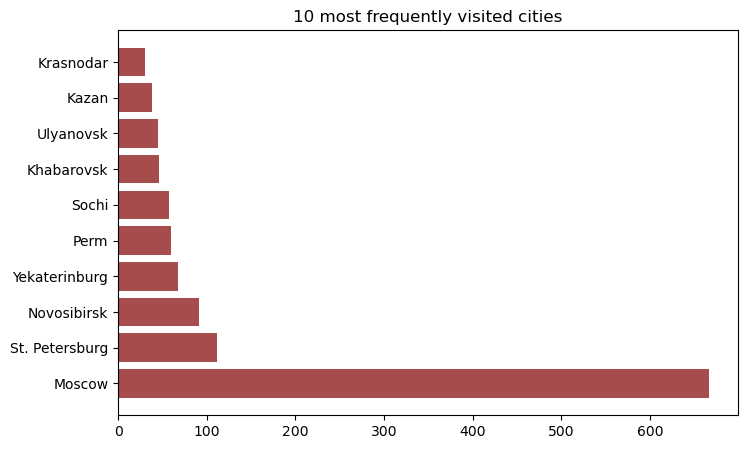

In [55]:
plt.figure(figsize = (8,5))
plt.barh(top_10['arrival_city'], top_10['count'], color = 'maroon', alpha = .7)
plt.title('10 most frequently visited cities')
plt.show()

In [62]:
max(df['booking_date'])

Timestamp('2017-08-14 20:49:00+0000', tz='UTC')

In [57]:
min(df['booking_date'])

Timestamp('2016-07-27 16:26:00+0000', tz='UTC')

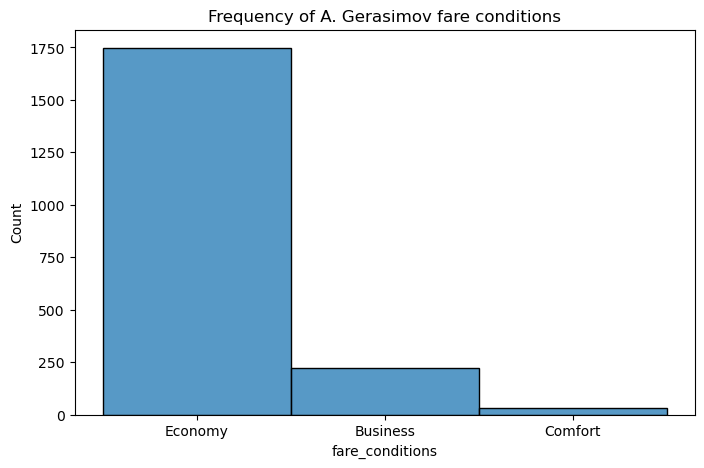

In [16]:
fig = plt.figure(figsize = (8,5))
sns.histplot(df, x = 'fare_conditions')
plt.title('Frequency of A. Gerasimov fare conditions')
plt.show()

In [90]:
df['dep_month'] = df['departure_dt'].dt.month
df['month_year'] = df['departure_dt'].dt.strftime('%m-%Y')
df.head()

,booking_date,fare_conditions,ticket_no,departure_airport,arrival_airport,departure_dt,arrival_dt,arrival_city,departure_city,dep_month,month_year
0,2017-04-23 22:36:00+00:00,Economy,0005432061772,SVO,AAQ,2017-05-10 15:09:00+00:00,2017-05-10 16:48:00+00:00,Anapa,Moscow,5.0,05-2017
1,2016-11-19 12:43:00+00:00,Economy,0005432066068,SVO,AER,2016-12-04 14:08:00+00:00,2016-12-04 15:52:00+00:00,Sochi,Moscow,12.0,12-2016
2,2016-10-31 07:29:00+00:00,Economy,0005432070785,SVO,BZK,2016-11-17 07:45:00+00:00,2016-11-17 08:15:00+00:00,Bryansk,Moscow,11.0,11-2016
3,2017-04-13 23:16:00+00:00,Economy,0005432071284,SVO,BZK,2017-04-29 07:42:00+00:00,2017-04-29 08:12:00+00:00,Bryansk,Moscow,4.0,04-2017
4,2016-08-17 11:34:00+00:00,Economy,0005432072198,SVO,CSY,2016-08-30 06:47:00+00:00,2016-08-30 07:38:00+00:00,Cheboksary,Moscow,8.0,08-2016


In [124]:
from datetime import datetime
stata = df.groupby('month_year')['ticket_no'].count().reset_index()
stata.columns = ['month_year', 'count']
# stata.sort_values(by = 'month_year', ascending = False)
stata['month_year'] = stata['month_year'].astype('str')
stata['date'] = stata['month_year'].apply(lambda x: datetime.strptime(x,'%m-%Y'))
stata.sort_values(by = 'date', inplace = True)

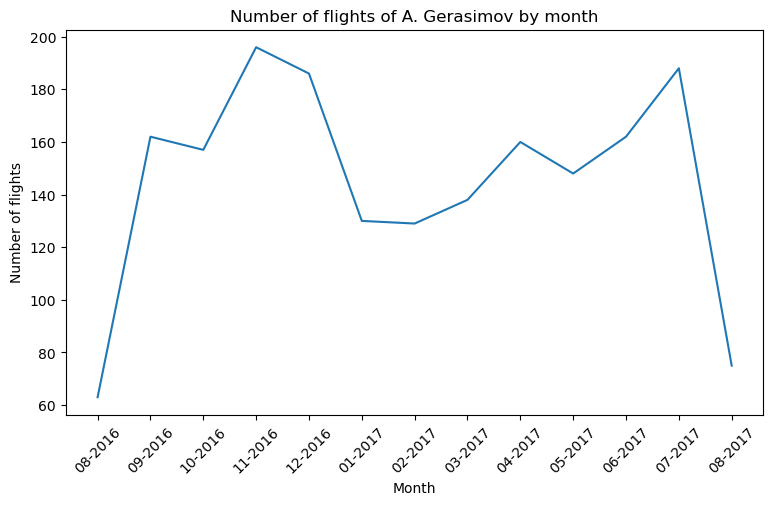

In [125]:
plt.figure(figsize = (9,5))
plt.plot(stata['month_year'], stata['count'])
plt.xticks(rotation = 45)
plt.xlabel('Month')
plt.ylabel('Number of flights')
plt.title('Number of flights of A. Gerasimov by month')
plt.show()